<a href="https://colab.research.google.com/github/BHam21/F1_DataAnalysis/blob/main/Mercedes_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This a little bit of analysis of Petronas Mercedes pace in previous testing to see if they are holding back pace or hiding tricks up their sleeve based off of comparison from previous Pre Season Testing on Day 3.

In [ ]:
import numpy as np
import pandas as pd 
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from datetime import datetime
%matplotlib inline

In [ ]:
#Function to display data frames side by side
def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

#Converting Laptimes to Seconds
def get_sec(a):
  x = datetime.strptime(a,'%M:%S.%f')
  time = x.minute*60+x.second+x.microsecond/1000000
  return time

In [ ]:
data_21={'Driver':['Max Verstappen','Yuki Tsunoda','Carlos Sainz','Kimi Raikkonen',
                   'Lewis Hamilton','George Russell','Daniel Ricciardo','Sergio Perez',
                   'Fernando Alonso','Charles Leclerc','Lando Norris','Pierre Gasly',
                   'Esteban Ocon','Nikita Mazepin','Mick Schumacher','Valtteri Bottas',
                   'Sebastian Vettel','Lance Stroll'],
                   
          'Team': ['Red Bull','Alpha Tauri','Ferrari','Alfa Romeo','Mercedes','Williams',
                  'McLaren','Red Bull','Alpine','Ferrari','McLaren','Alpha Tauri','Alpine',
                  'Haas','Haas','Mercedes','Aston Martin','Aston Martin'],
         
         'Time': ['1:28.960','1:29.053','1:29.611','1:29.766','1:30.025','1:30.117',
                  '1:30.144','1:30.187','1:30.318','1:30.486','1:30.661','1:30.828',
                  '1:31.310','1:31.531','1:32.053','1:32.406','1:35.041','1:36.100'],

         'Laps': [64,91,79,165,54,157,75,49,77,80,56,76,61,67,78,86,56,80],
                  
        'Year':['2021','2021','2021','2021','2021','2021','2021','2021','2021',
                 '2021','2021','2021','2021','2021','2021','2021','2021','2021']}

data_20={'Driver':['Valtteri Bottas','Lewis Hamilton','Esteban Ocon','Lance Stroll',
                   'Danniil Kvyat','Antonio Giovinazzi','Daniel Ricciardo','Max Verstappen',
                   'Pierre Gasly','Alex Albon','Carlos Sainz','Romain Grosjean',
                   'Sebastian Vettel','Lando Norris','Nicholas Latifi','Kevin Magnussen'],
                   
          'Team': ['Mercedes','Mercedes','Alpine','Aston Martin','Alpha Tauri','Alfa Romeo',
                  'Alpine','Red Bull','Alpha Tauri','Red Bull','McLaren','Haas','Ferrari',
                  'McLaren','Williams','Haas'],
         
         'Time': ['1:15.732','1:16.516','1:17.102','1:17.338','1:17.427',
                  '1:17.469','1:17.564','1:17.636','1:17.783','1:18.154','1:18.274',
                  '1:18.380','1:18.384','1:18.454','1:19.004','1:19.709'],

         'Laps': [65,73,76,116,62,152,93,86,59,83,76,48,100,49,72,4],
         
         'Year':['2020','2020','2020','2020','2020','2020','2020','2020','2020',
                 '2020','2020','2020','2020','2020','2020','2020']}


data_19={'Driver':['Sebastian Vettel','Lewis Hamilton','Valtteri Bottas','Nico Hulkenburg','Danniil Kvyat',
                   'Carlos Sainz','Romain Grosjean','Daniel Ricciardo','Kimi Raikkonen',
                   'Kevin Magnussen','Max Verstappen','Sergio Perez','Robert Kubica'],
                   
          'Team': ['Ferrari','Mercedes','Mercedes','Alpine','Alpha Tauri','McLaren',
                  'Haas','Alpine','Alfa Romeo','Haas','Red Bull','Aston Martin','Williams'],
         
         'Time': ['1:16.221','1:16.224','1:16.561','1:16.843','1:16.898',
                  '1:16.913','1:17.076','1:17.114','1:17.239','1:17.565','1:17.709',
                  '1:17.791','1:18.993'],

         'Laps': [110,61,71,51,131,134,73,52,132,94,29,104,90],
         
         'Year':['2019','2019','2019','2019','2019','2019','2019','2019','2019',
                 '2019','2019','2019','2019']}


df21=pd.DataFrame(data_21)
df21['Time'] = df21['Time'].apply(get_sec)
df20=pd.DataFrame(data_20)
df20['Time'] = df20['Time'].apply(get_sec)
df19=pd.DataFrame(data_19)
df19['Time'] = df19['Time'].apply(get_sec)
dfmain=df19.append(df20)
dfmain=dfmain.append(df21)
dfmain.to_csv(r'F1Testing.csv',index=False)


In [ ]:
display_side_by_side([df19,df20,df21],['2019 Testing','2020 Testing','2021 Testing'])

,Driver,Team,Time,Laps,Year
0,Sebastian Vettel,Ferrari,76.221000,110,2019
1,Lewis Hamilton,Mercedes,76.224000,61,2019
2,Valtteri Bottas,Mercedes,76.561000,71,2019
3,Nico Hulkenburg,Alpine,76.843000,51,2019
4,Danniil Kvyat,Alpha Tauri,76.898000,131,2019
5,Carlos Sainz,McLaren,76.913000,134,2019
6,Romain Grosjean,Haas,77.076000,73,2019
7,Daniel Ricciardo,Alpine,77.114000,52,2019
8,Kimi Raikkonen,Alfa Romeo,77.239000,132,2019
9,Kevin Magnussen,Haas,77.565000,94,2019


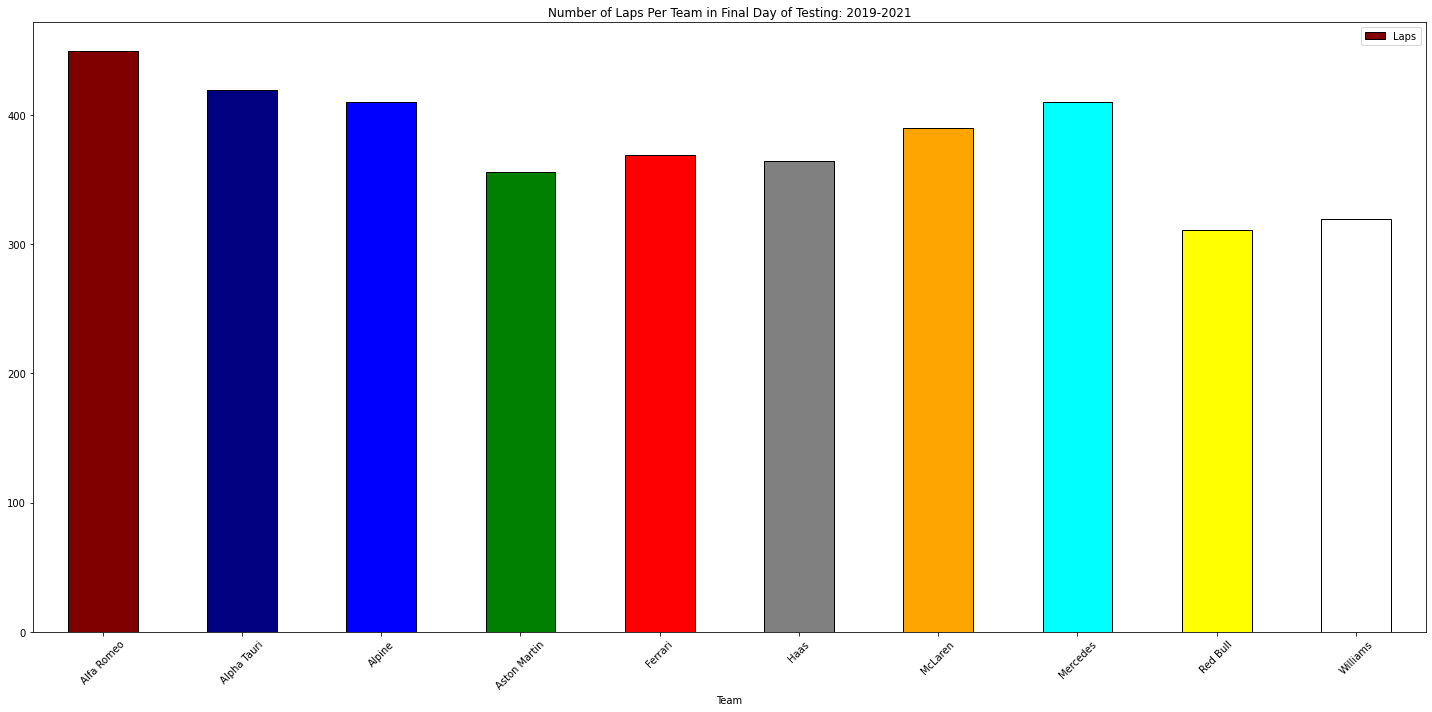

In [ ]:
dfmain.groupby(['Team']).sum().plot.bar(y='Laps',figsize=(20,10),
                                        color=['maroon','navy','blue','green','red','grey',
                                               'orange','cyan','yellow','white'],edgecolor='black')
plt.title('Number of Laps Per Team in Final Day of Testing: 2019-2021')
plt.xticks(rotation = 45)
plt.tight_layout()

In [ ]:
dfmain.groupby(['Team']).sum()

,Time,Laps
Team,,
Alfa Romeo,244.474,449
Alpha Tauri,411.989,419
Alpine,490.251,410
Aston Martin,346.270,356
Ferrari,334.702,369
Haas,496.314,364
McLaren,414.446,390
Mercedes,487.464,410
Red Bull,412.646,311


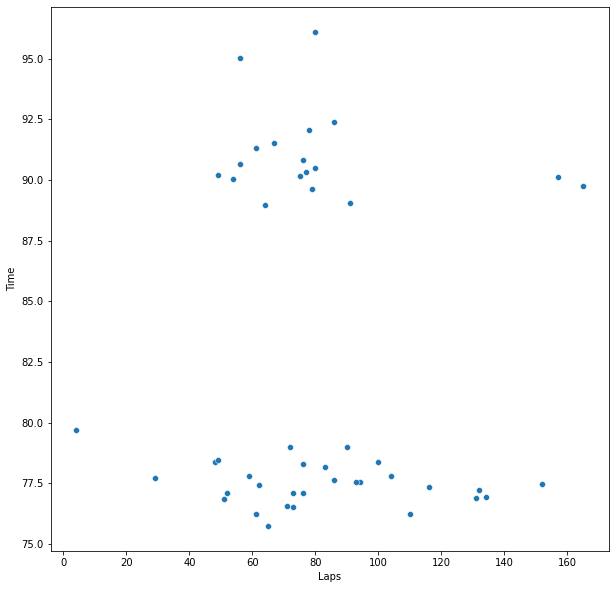

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=dfmain,x='Laps',y='Time')

In [ ]:
df_avg=dfmain.groupby(['Team','Year']).mean()

In [ ]:
df_avg['TPL']=df_avg['Time']/df_avg['Laps']

In [ ]:
df_avg.groupby(['Team']).mean()

,Time,Laps,TPL
Team,,,
Alfa Romeo,81.491333,149.666667,0.546282
Alpha Tauri,81.481167,91.666667,0.982289
Alpine,81.708500,68.333333,1.242019
Aston Martin,83.566500,96.000000,0.940049
Ferrari,81.551167,96.500000,0.869815
Haas,82.719000,60.666667,1.744088
McLaren,81.893167,87.333333,1.069331
Mercedes,81.244000,68.333333,1.187929
Red Bull,81.725833,56.666667,1.728942
